<a href="https://colab.research.google.com/github/ducnguyen8600/Breast-Cancer-Prediction-Project/blob/main/Breast_Cancer_Prediction_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breast Cancer Prediction**

##**1. Load Data**

###**Import packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

###**Import data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Breast_Cancer_Prediction_Data.csv')

##**2. Data Cleaning**

###**Inspect Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**We remove the standard error features, along with the `id` and `Unnamed: 32` column, to focus on mean and worst features when analyzing their correlation with cancer categories.**

In [ ]:
se_cols = df.columns[df.columns.str.contains('se', case=False)]
df = df.drop(columns = ['Unnamed: 32', 'id'])
df = df.drop(columns = se_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_worst             569 non-null    float64
 12  texture_worst            569 non-null    float64
 13  perimeter_worst          569 non-null    float64
 14  area_worst               5

###**Check duplicate data**

In [ ]:
df.duplicated().sum()

np.int64(0)

**No duplicate data on this dataset**

###**Check missing value**

In [ ]:
df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


**There is no missing value in the dataset**

###**Check Target Column**

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


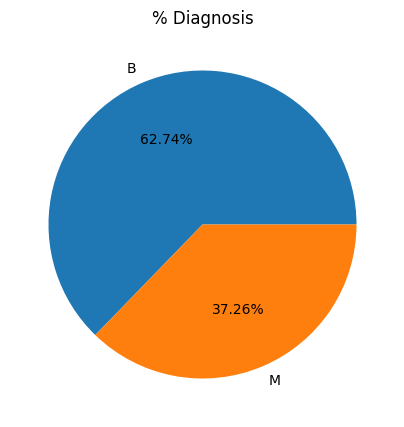

In [ ]:
df['diagnosis'].value_counts(normalize=True).mul(100).plot(kind='pie', autopct='%1.2f%%', figsize=(5, 5))

plt.ylabel('')
plt.title('% Diagnosis')
plt.show()

##**3. Exploratory Data Analysis**

###**Divide features into 2 groups include mean features and worst features**

In [ ]:
mean_cols = df.columns[df.columns.str.contains('mean', case=False)].to_list()
worst_cols = df.columns[df.columns.str.contains('worst', case=False)].to_list()

print(mean_cols)
print(worst_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


###**Dataset central tendency**

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_test = df.copy()
num_cols = df_test.select_dtypes(include= 'number').columns


for col in num_cols:
  Q1 = df_test[col].quantile(0.25)
  Q3 = df_test[col].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df_test = df_test[(df_test[col] >= lower) & (df_test[col] <= upper)]

df_test['diagnosis'].value_counts()

,count
diagnosis,
B,324
M,47


**Deleting outliers results in a significant decrease in the number of 'M' values in the target column, so we decide not to remove outliers.**

###**Mean features central tendency**

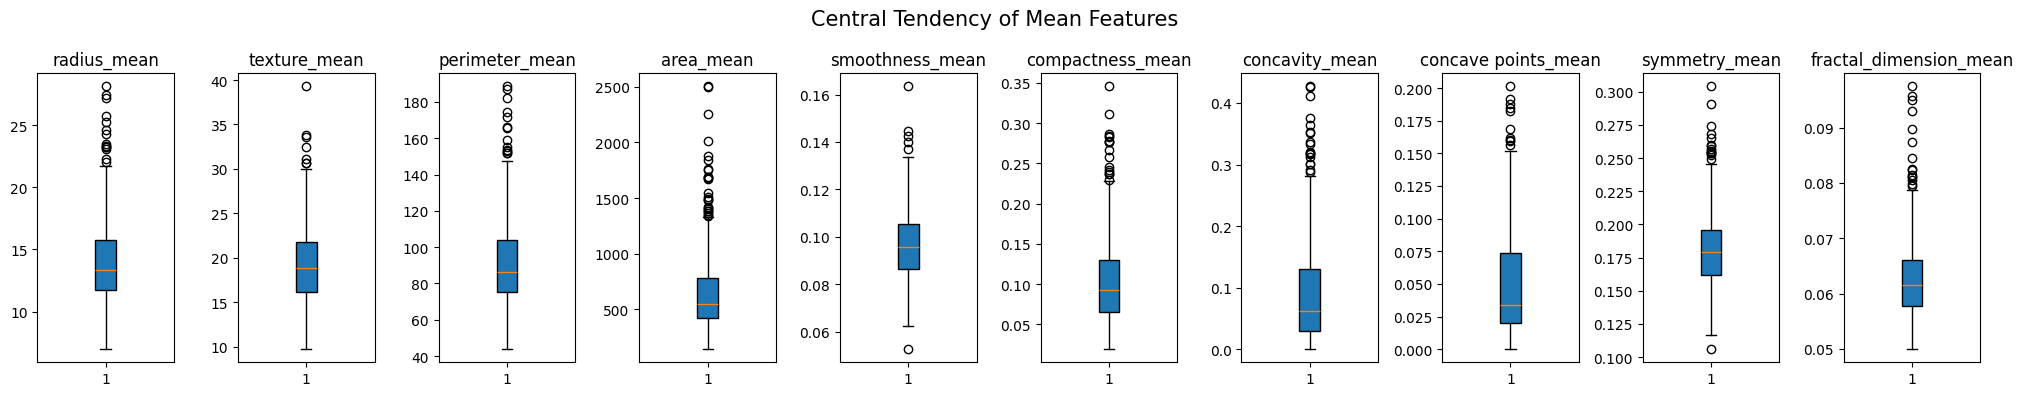

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20,4))
fig.suptitle("Central Tendency of Mean Features", fontsize = 15)
for i, col in enumerate(mean_cols):
    axes[i].boxplot(df[col], patch_artist=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

####**Mean features central tendency by Diagnosis**

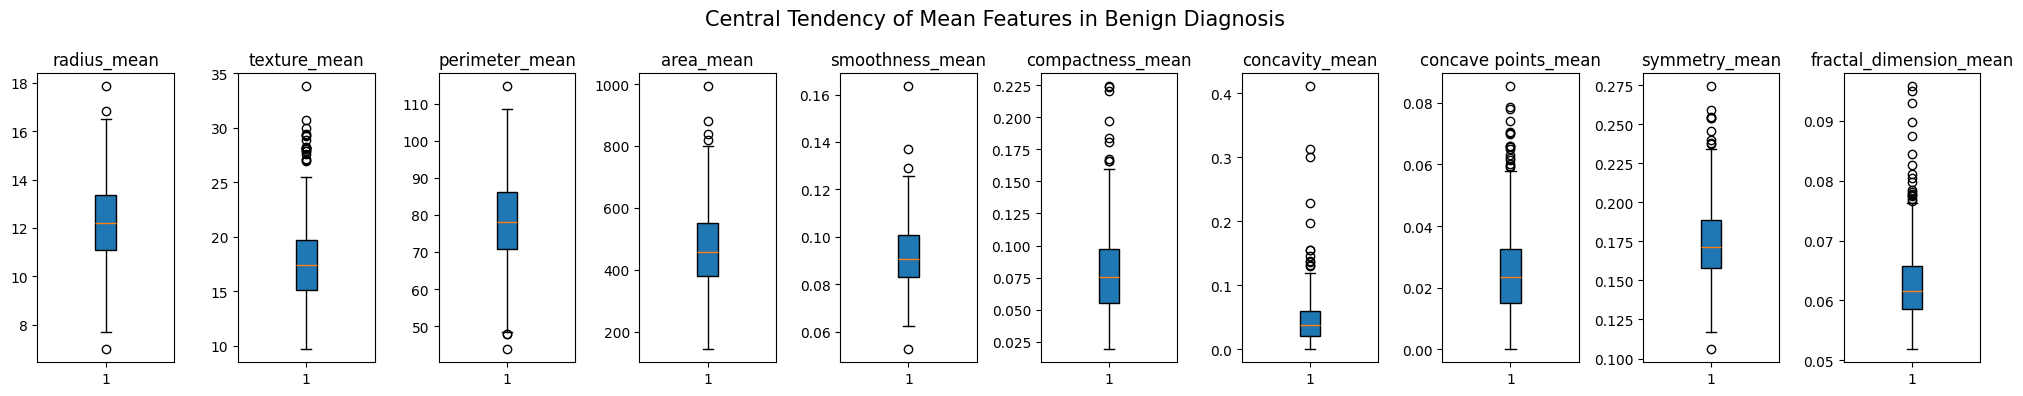

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20,4))
fig.suptitle("Central Tendency of Mean Features in Benign Diagnosis", fontsize = 15)
for i, col in enumerate(mean_cols):
    axes[i].boxplot(df[col][df['diagnosis'] == 'B'], patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

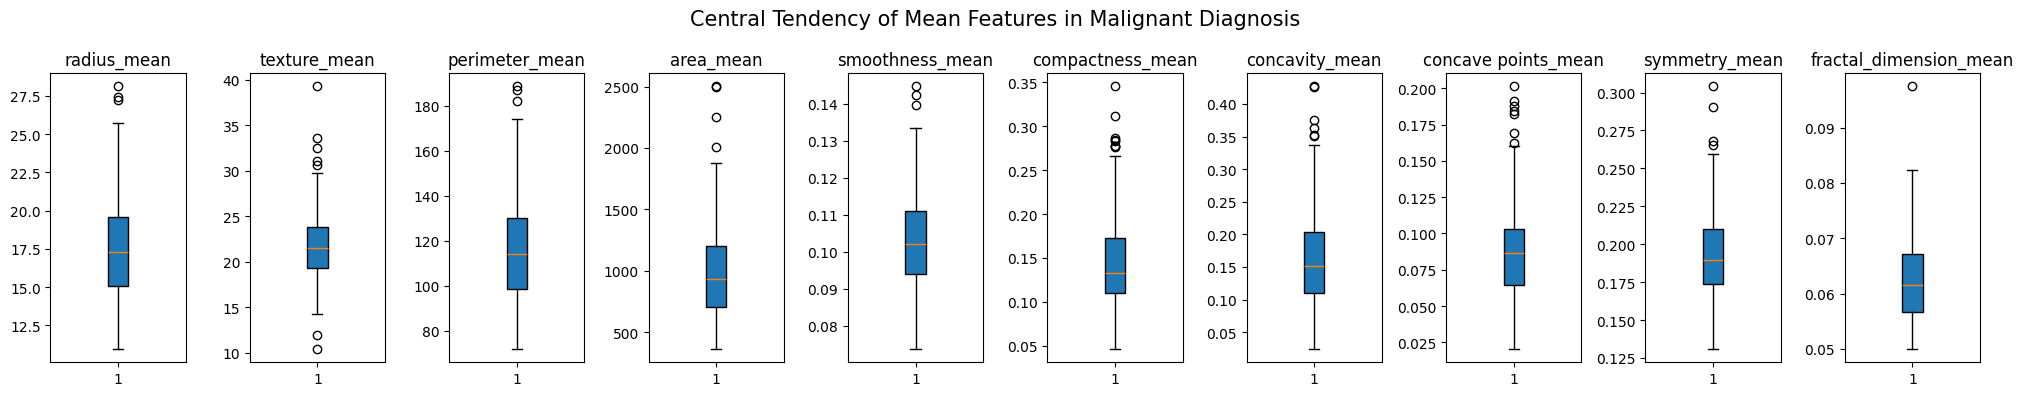

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20,4))
fig.suptitle("Central Tendency of Mean Features in Malignant Diagnosis", fontsize = 15)
for i, col in enumerate(mean_cols):
    axes[i].boxplot(df[col][df['diagnosis'] == 'M'], patch_artist=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

####**Conclusion: Descriptive statistic of Mean features**

- **Mean**: Size-related features (such as radius, perimeter, and area) generally exhibit higher mean values compared to ratio-based features like smoothness or compactness. Those values accurately reflect the morphological characteristics of the dataset.

- **Standard deviation**: The standard deviations vary considerably across feature types

  - Size-related features show larger standard deviations, indicating substantial variability among observations.

  - Other features (smoothness, etc.) display smaller standard deviations, suggesting a more concentrated distribution.

- **Min-Max**: The min–max ranges indicate the presence of distant values, especially in size features. These may represent natural biological variation rather than measurement errors, implying the presence of natural outliers.

**When comparing the B and M classes:**
- **Malignant (M)** samples tend to have notably higher mean values for size-related features such as `radius`, `perimeter`, and `area`. A significant increase in `concave points` value was also observed in these samples

- **Benign (B)** samples show lower mean values, consistent with the typically smaller morphological characteristics of benign tissues.

- The `concavity` feature shows a large difference between the two classes. While the upper bound of this feature in the B class is around 0.12, it is approximately 0.34 in the M class. This difference may indicate a significant distinction between the two groups.

###**Distribution of Mean features by Diagnosis**

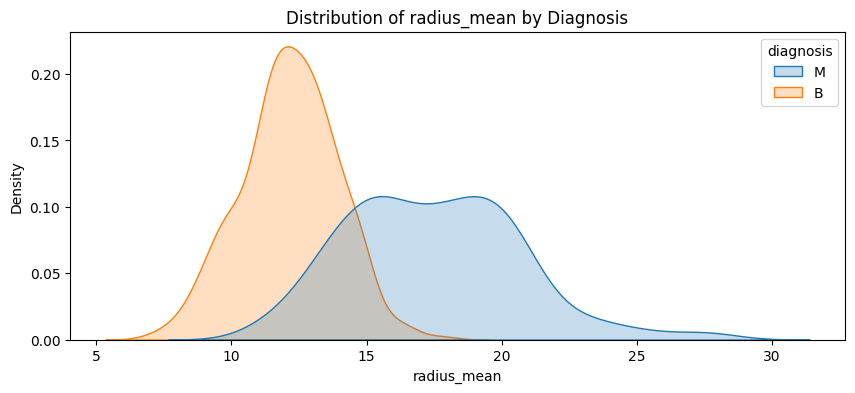

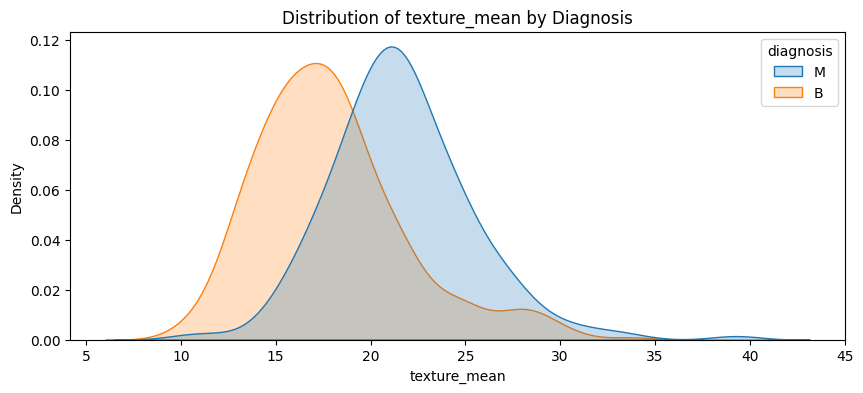

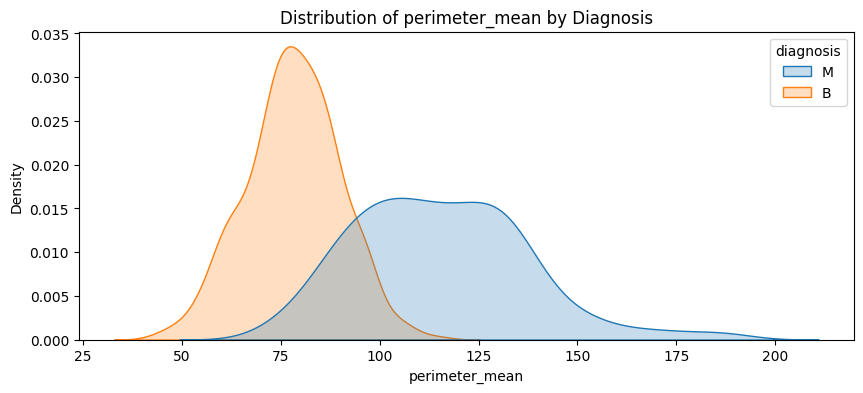

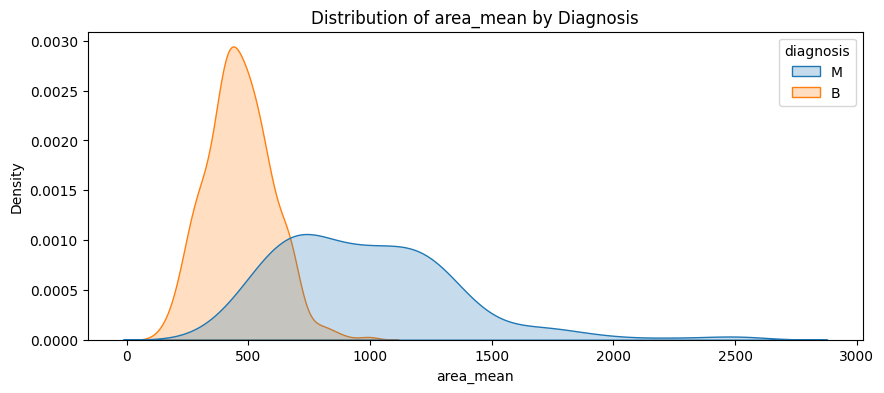

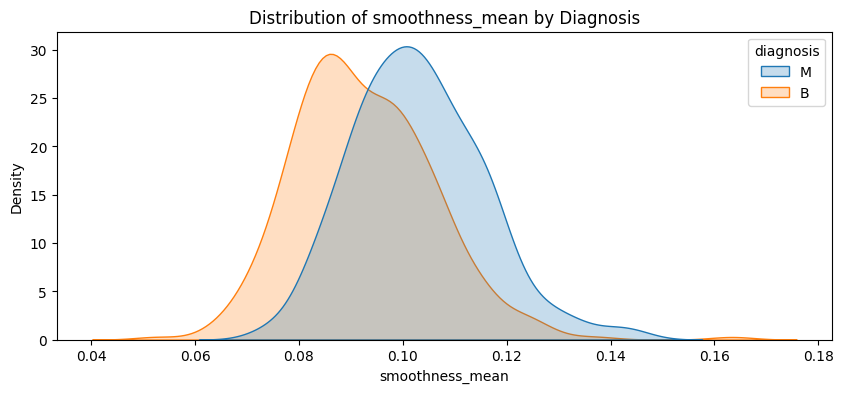

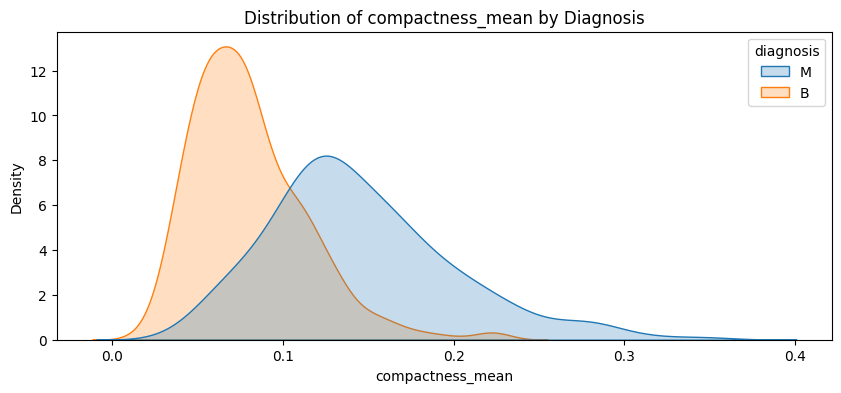

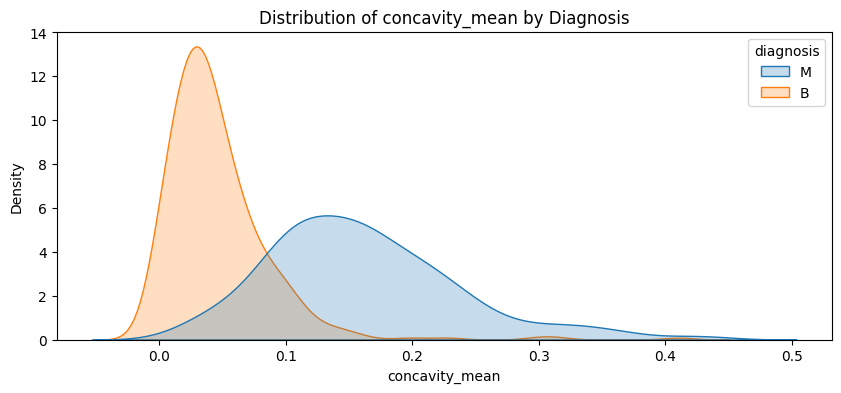

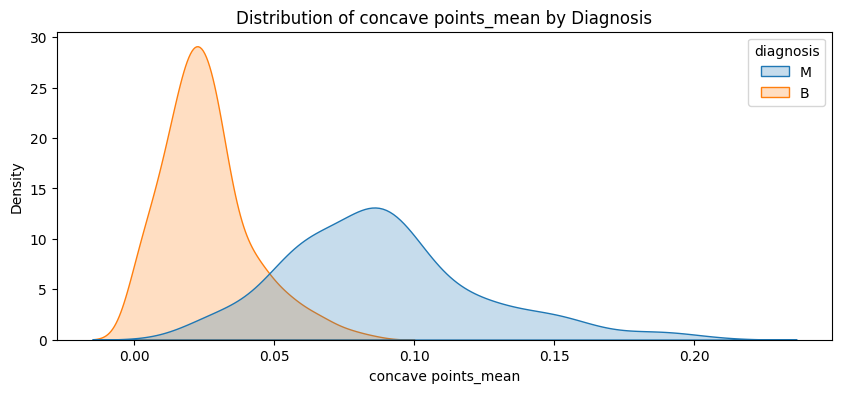

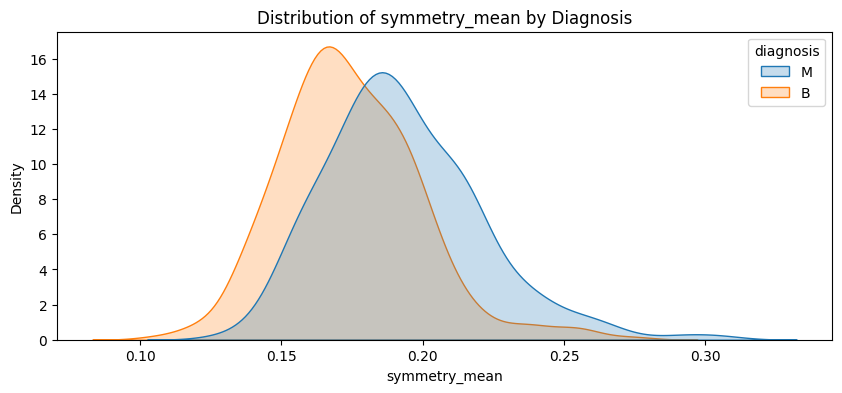

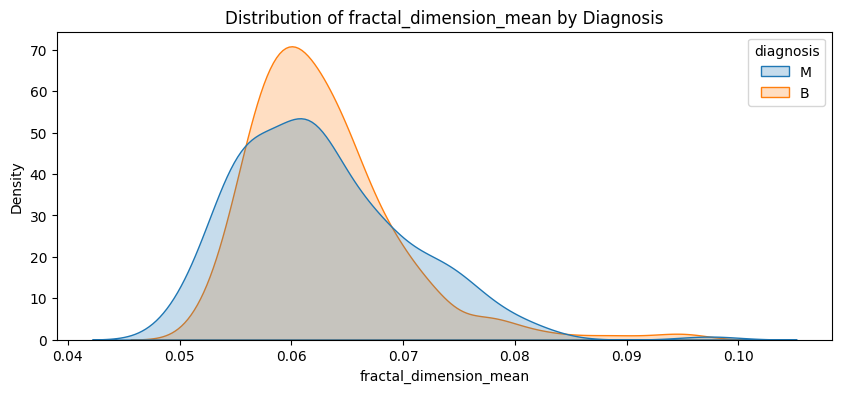

In [ ]:
for col in mean_cols:
  plt.figure(figsize=(10, 4))
  sns.kdeplot(data=df, x= col, hue='diagnosis', fill=True, common_norm = False)
  plt.title(f"Distribution of {col} by Diagnosis")
  plt.xlabel(f"{col}")
  plt.ylabel("Density")
  plt.show()

**The distributions of features reveal significant differences between Benign and Malignant cases for all mean variables, with the exception of fractal dimension and potentially symmetry.**

###**Worst features central tendency**

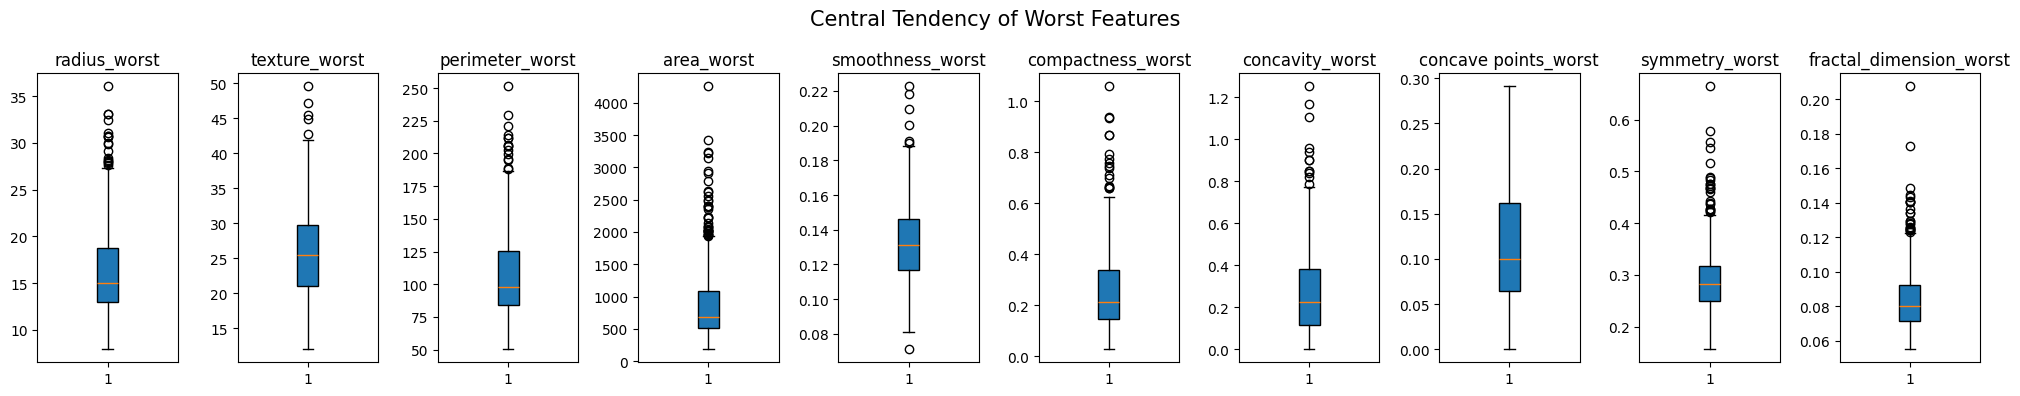

In [ ]:
m = len(worst_cols)
fig, axes = plt.subplots(1, m, figsize=(2*m, 4))
fig.suptitle("Central Tendency of Worst Features", fontsize = 15)
for i, col in enumerate(worst_cols):
    axes[i].boxplot(df[col], patch_artist=True)
    axes[i].set_title(col)
    plt.tight_layout()
plt.show()

####**Worst features central tendency by Diagnosis**

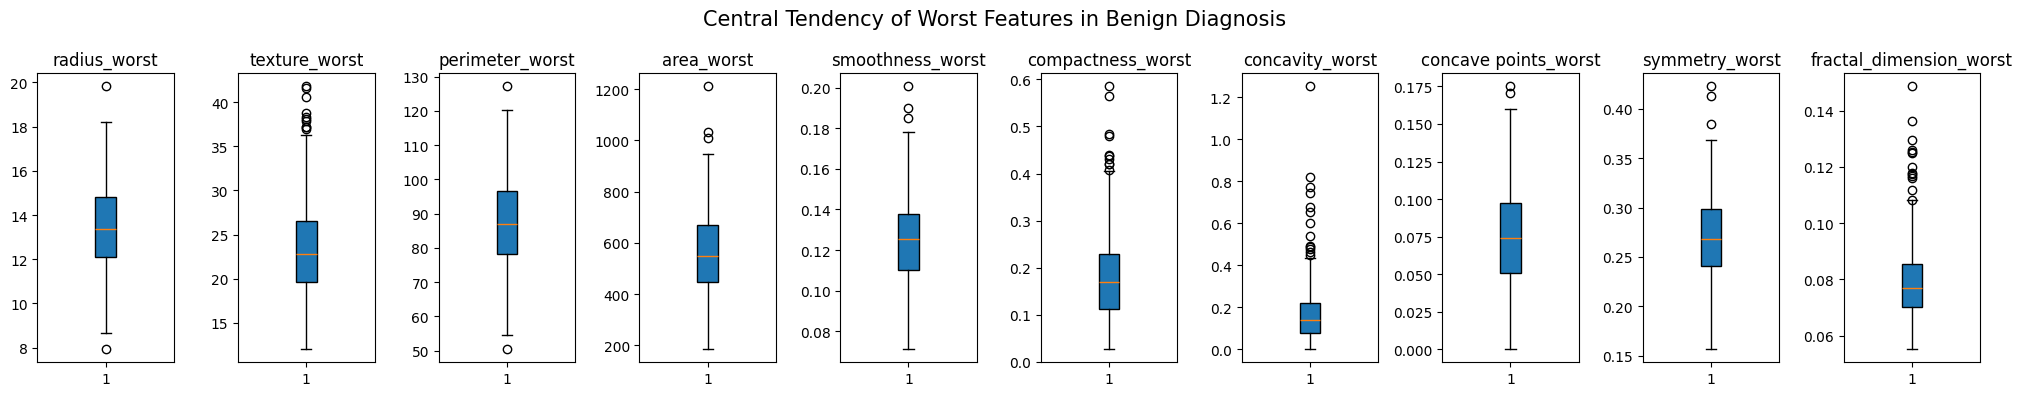

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20,4))
fig.suptitle("Central Tendency of Worst Features in Benign Diagnosis", fontsize = 15)
for i, col in enumerate(worst_cols):
    axes[i].boxplot(df[col][df['diagnosis'] == 'B'], patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

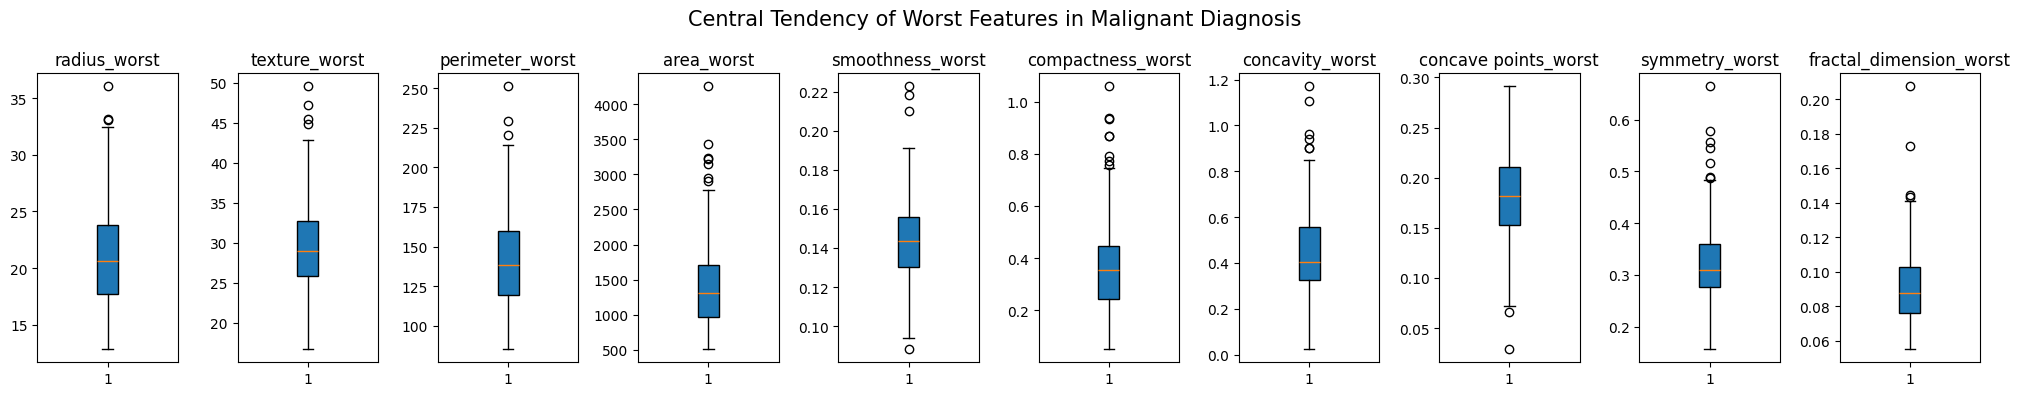

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20,4))
fig.suptitle("Central Tendency of Worst Features in Malignant Diagnosis", fontsize = 15)
for i, col in enumerate(worst_cols):
    axes[i].boxplot(df[col][df['diagnosis'] == 'M'], patch_artist=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

####**Conclusion: Descriptive statistic of Worst features**

**The mean, standard deviation, min–max range, and the differences between the two classes lead to the same conclusion as the mean value.**

###**Distribution of Worst features by Diagnosis**

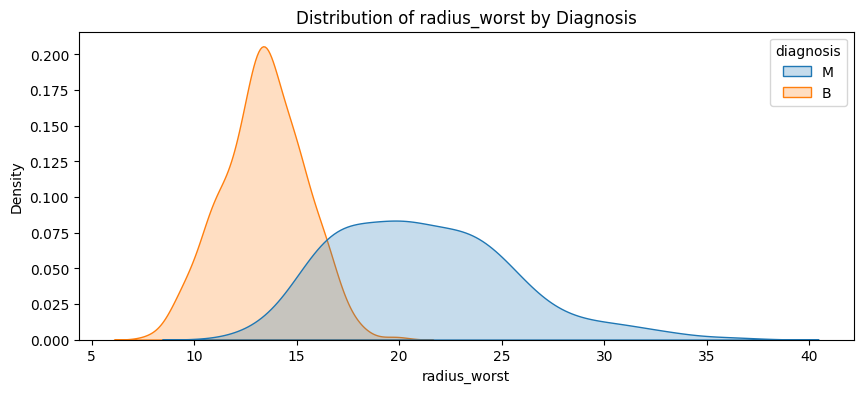

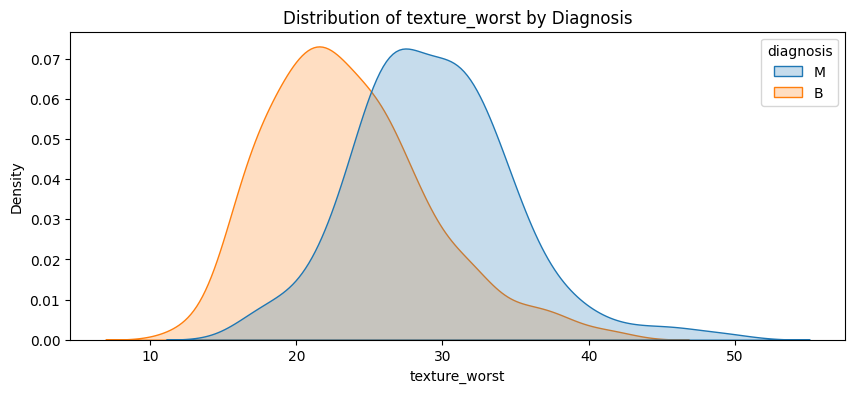

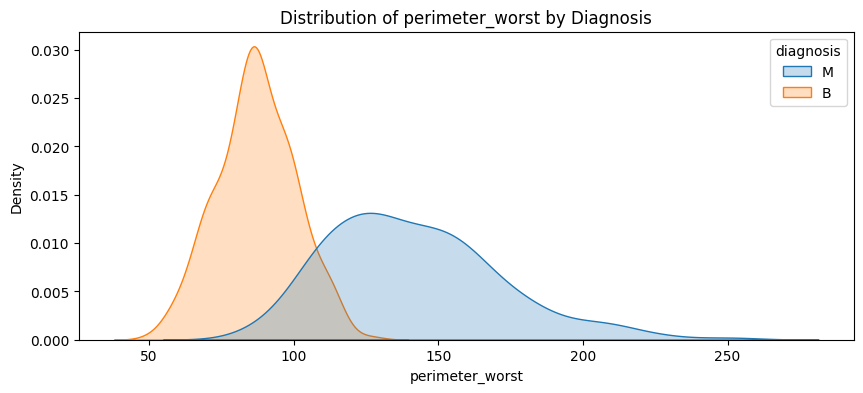

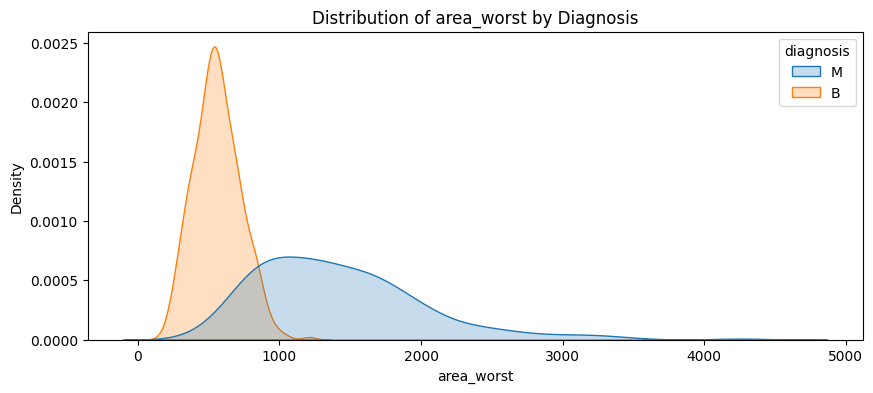

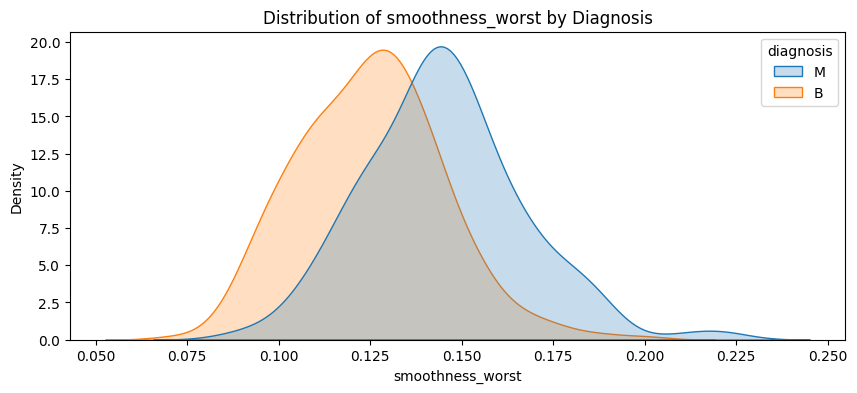

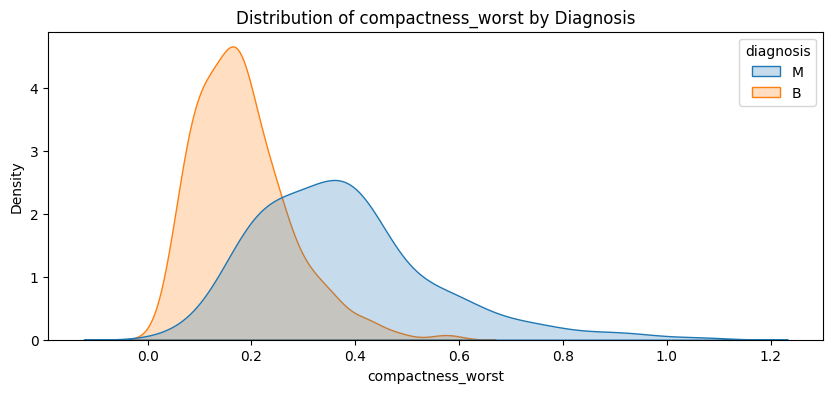

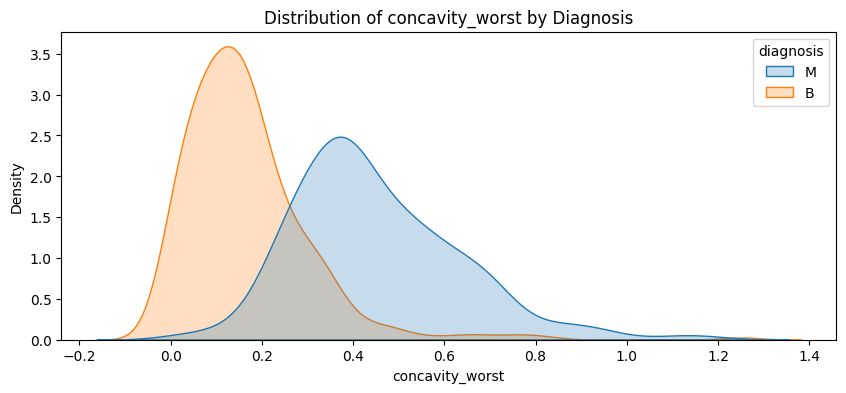

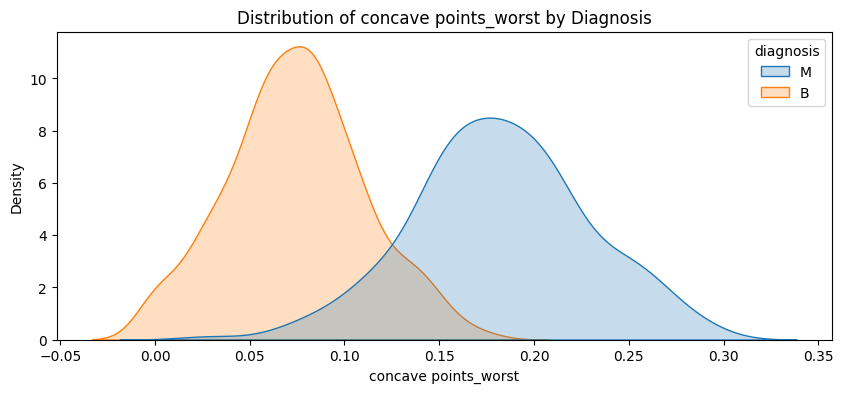

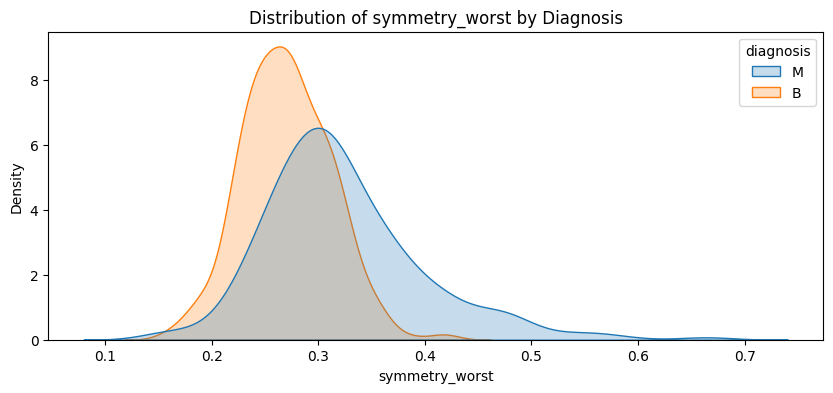

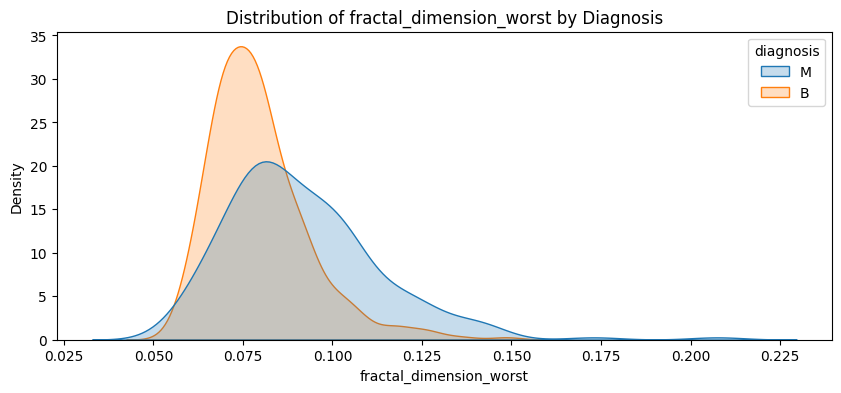

In [ ]:
for col in worst_cols:
  plt.figure(figsize=(10, 4))
  sns.kdeplot(data=df, x= col, hue='diagnosis', fill=True, common_norm = False)
  plt.title(f"Distribution of {col} by Diagnosis")
  plt.xlabel(f"{col}")
  plt.ylabel("Density")
  plt.show()

**The distributions of features reveal significant differences between Benign and Malignant cases for all worst variables, with the exception of symmetry and potentially fractal dimension.**

###**Convert the target column to a binary format (0 for benign, 1 for malignant).**

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M': 1}).astype(int)

df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


###**Check Multicolinearity**

####**Identify highly correlated features**

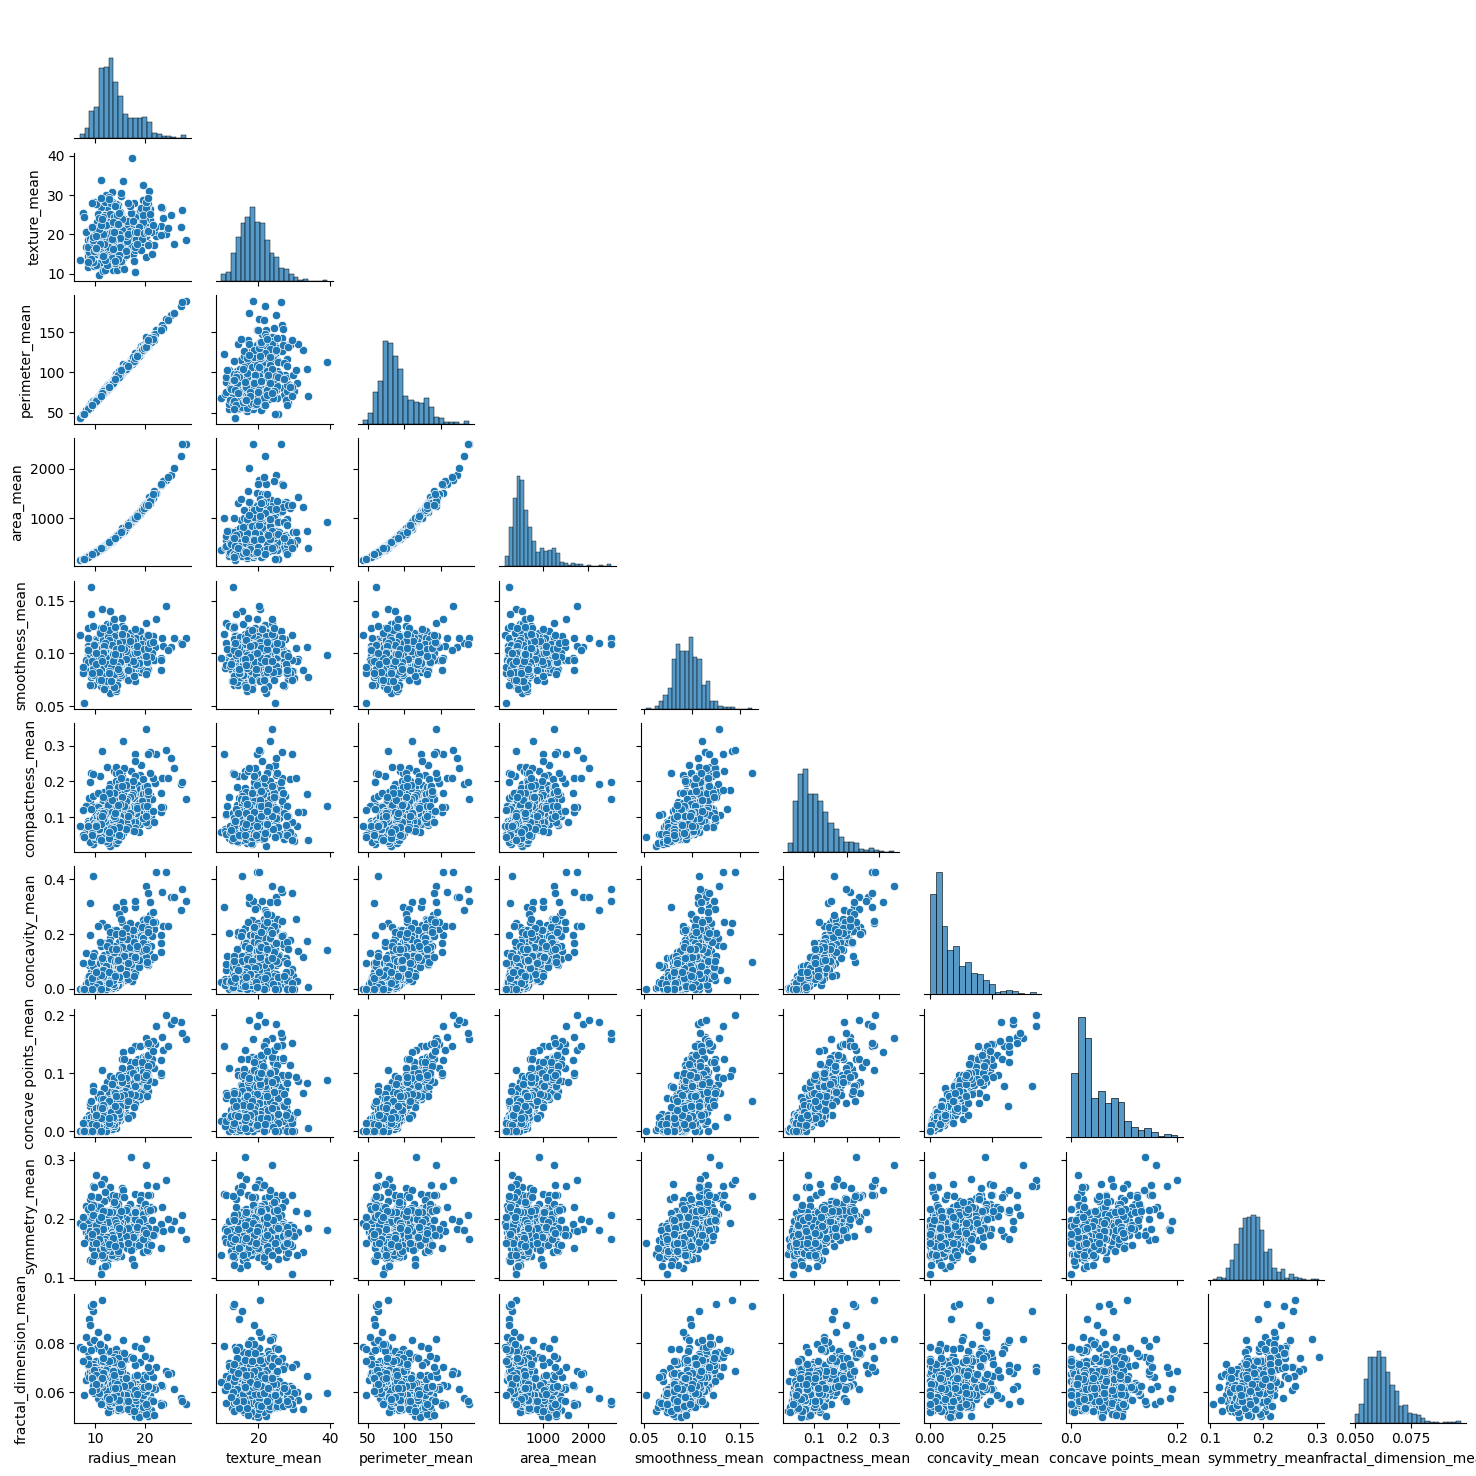

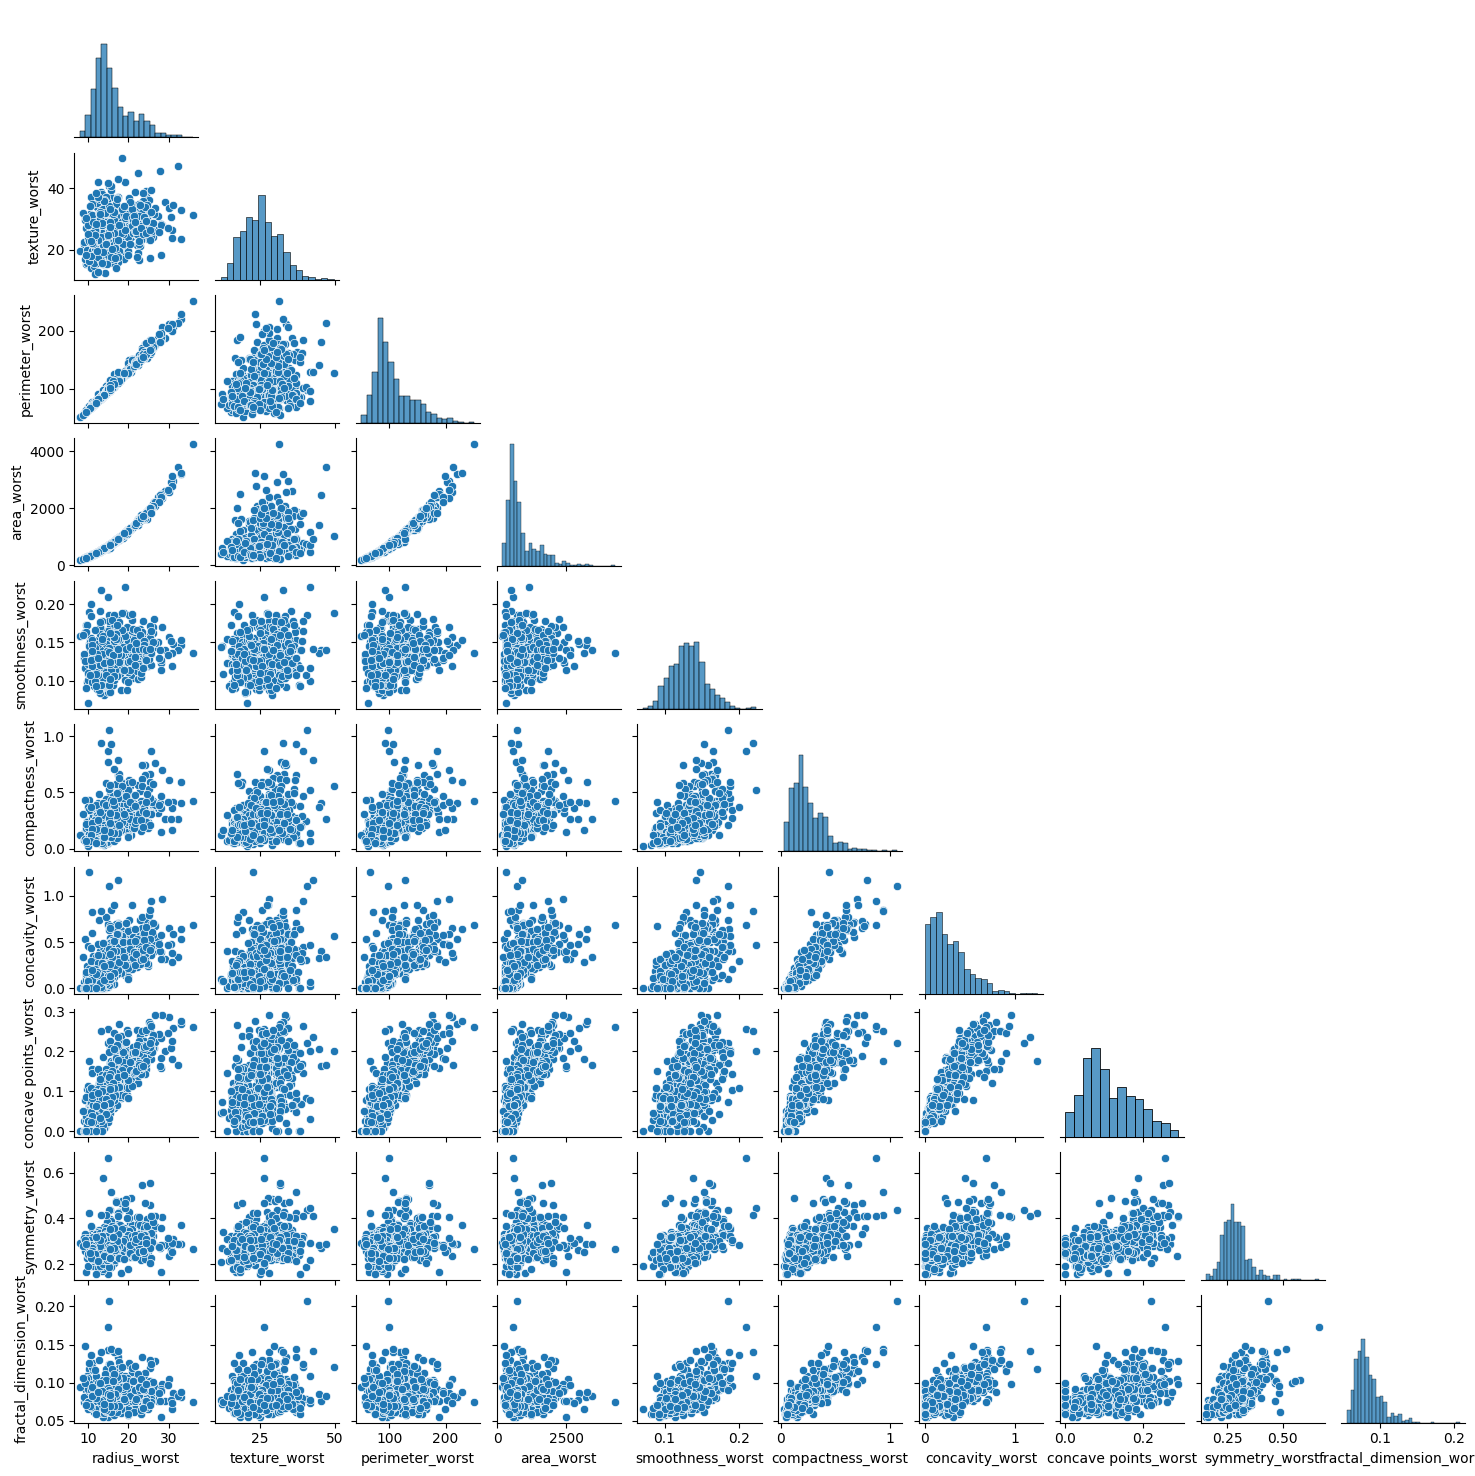

In [ ]:
for i in [mean_cols, worst_cols]:
  sns.pairplot(df[i], corner = True, height = 1.5);

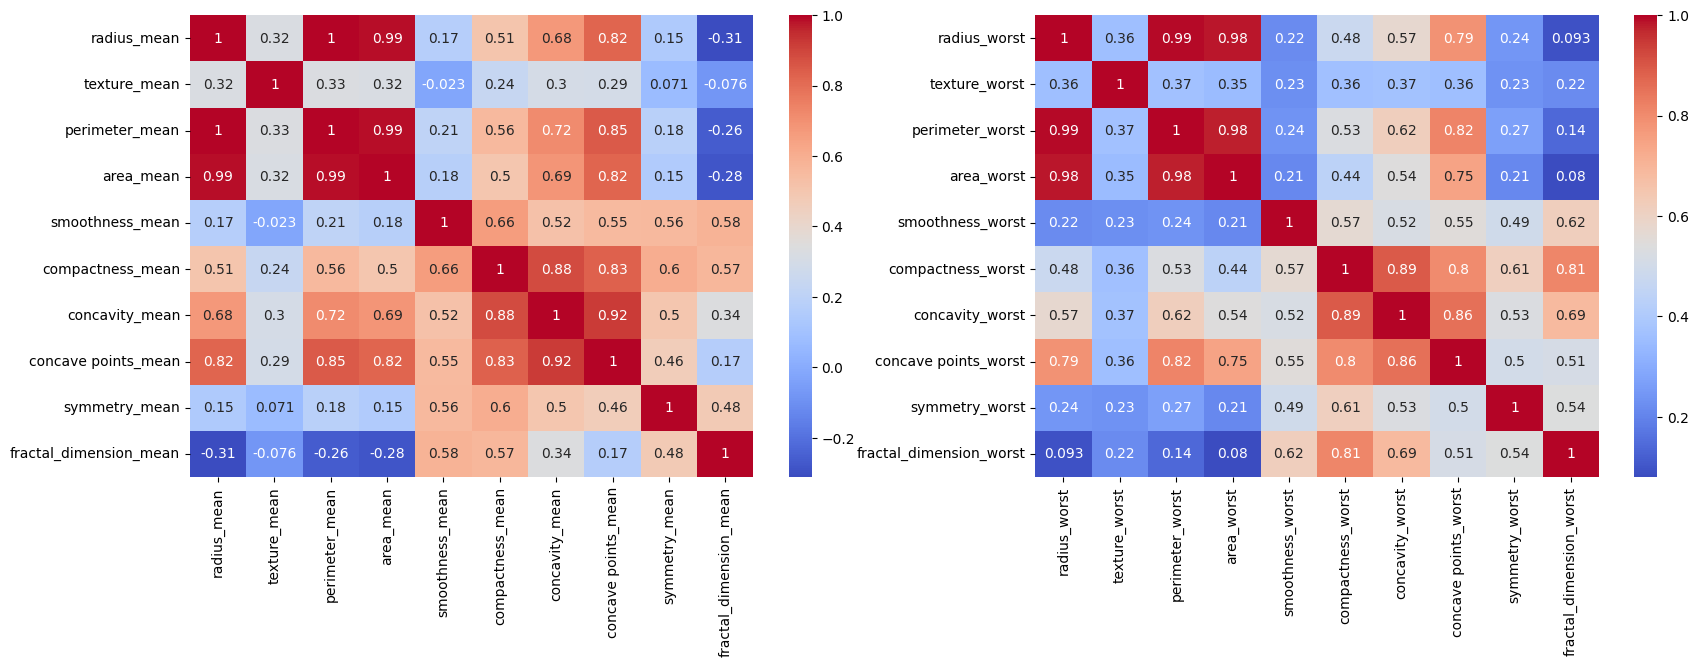

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for ax, i in zip(axes, [mean_cols, worst_cols]):
  sns.heatmap(df[i].corr(), annot = True, cmap = 'coolwarm', ax = ax);

**Conclusion**

We selected the highly correlated features (correlation > 0.8). Among these features, we identified two groups:

- Size-related features: `radius`, `perimeter`, `area`

- Concavity-related features: `concavity`, `concave points`, `compactness`

####**Select a feature that best represents the group**

**The correlations between compactness, concavity, concave points with the diagnosis were analyzed to identify and retain the feature exhibiting the strongest association.**

In [ ]:
## Mean feature:
for i in ['concave points_mean', 'concavity_mean', 'compactness_mean']:
  X = df[i]
  y = df['diagnosis']
  X = sm.add_constant(X)

  model = sm.Logit(y, X).fit()
  print(model.summary())

Optimization terminated successfully.
         Current function value: 0.227525
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.6554
Time:                        03:27:21   Log-Likelihood:                -129.46
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.039e-109
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.8437      0.480    -12.167      0.000      -6.785      -4.902
co

**Because these features all have p-values < 0.05, we will choose the one with the higher coefficient. So we go with `concave points_mean`.**

In [ ]:
## Worst feature:
for i in ['concave points_worst', 'concavity_worst', 'compactness_worst']:
  X = df[i]
  y = df['diagnosis']
  X = sm.add_constant(X)

  model = sm.Logit(y, X).fit()
  print(model.summary())

Optimization terminated successfully.
         Current function value: 0.220080
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.6667
Time:                        03:27:21   Log-Likelihood:                -125.23
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                5.791e-111
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.2573      0.708    -11.666      0.000      -9.645      -6.870

**As with the mean, we go with `concave points_worst`.**

**The correlations between radius, perimeter, area with the diagnosis were analyzed to identify and retain the feature exhibiting the strongest association.**

In [ ]:
## Mean feature:
for i in ['radius_mean', 'area_mean', 'perimeter_mean']:
  X = df[i]
  y = df['diagnosis']
  X = sm.add_constant(X)

  model = sm.Logit(y, X).fit()
  print(model.summary())

Optimization terminated successfully.
         Current function value: 0.289992
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.5608
Time:                        03:27:21   Log-Likelihood:                -165.01
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 1.192e-93
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -15.2459      1.325    -11.509      0.000     -17.842     -12.649
radius_mean     1.0336    

**Because these features all have p-values < 0.05, we will choose the one with the higher coefficient. We go with `radius_mean`.**

In [ ]:
## Worst feature:
for i in ['radius_worst', 'area_worst', 'perimeter_worst']:
  X = df[i]
  y = df['diagnosis']
  X = sm.add_constant(X)

  model = sm.Logit(y, X).fit()
  print(model.summary())

Optimization terminated successfully.
         Current function value: 0.201326
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.6951
Time:                        03:27:21   Log-Likelihood:                -114.55
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.316e-115
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.1745      1.871    -10.250      0.000     -22.841     -15.508
radius_worst     1.1538

**As with the mean, we go with `radius_worst`.**

####**Exclude the remaining features in the group**

**We removed the features perimeter, area, concavity, and compactness due to high multicollinearity, retaining only one representative variable for each correlated group.**

In [ ]:
for i in ['perimeter_mean', 'area_mean', 'concavity_mean', 'compactness_mean']:
  mean_cols.remove(i)
for i in ['perimeter_worst', 'area_worst', 'concavity_worst', 'compactness_worst']:
  worst_cols.remove(i)

print(mean_cols)
print(worst_cols)

['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_worst', 'texture_worst', 'smoothness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


##**4. Analysis**

###**Build and Evaluation Logistic Regression Model**

####**Mean features**

#####**Build model**

In [ ]:
X_mean = df[mean_cols]
y = df['diagnosis']

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y, test_size = 0.25, stratify = y, random_state = 42)

X_train_mean = sm.add_constant(X_train_mean)
X_test_mean = sm.add_constant(X_test_mean)

lr_model_mean = sm.Logit(y_train_mean, X_train_mean).fit()

Optimization terminated successfully.
         Current function value: 0.134093
         Iterations 10


In [ ]:
lr_model_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  426
Model:                          Logit   Df Residuals:                      419
Method:                           MLE   Df Model:                            6
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.7970
Time:                        03:27:21   Log-Likelihood:                -57.124
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 9.664e-94
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -29.0522      8.014     -3.625      0.000     -44.759     -13.345
radius_mean                0.7982      0.251      3.177      0.001       0.306       1.291
texture_mean               0.4162      0.078      5.352      0.000       0.264       0.569
smoothness_mean           69.5615     29.474      2.360      0.018      11.793     127.330
concave points_mean       84.8429     23.874      3.554      0.000      38.051     131.634
symmetry_mean             15.6529     11.702      1.338      0.181      -7.283      38.589
fractal_dimension_mean   -75.4850     65.324     -1.156      0.248    -203.518      52.548
==========================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Because smoothness_mean, symmetry_mean and fractal_dimension_mean have p_value > 0.05 we remove it from the model**

In [ ]:
X_mean_new = df[mean_cols].drop(columns = ['symmetry_mean', 'fractal_dimension_mean'])
y = df['diagnosis']

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean_new, y, test_size = 0.25, stratify = y, random_state = 42)

X_train_mean = sm.add_constant(X_train_mean)
X_test_mean = sm.add_constant(X_test_mean)

lr_model_mean_new = sm.Logit(y_train_mean, X_train_mean).fit()

Optimization terminated successfully.
         Current function value: 0.137637
         Iterations 10


In [ ]:
lr_model_mean_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  426
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.7917
Time:                        03:27:21   Log-Likelihood:                -58.633
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                 3.856e-95
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -32.5573      5.801     -5.612      0.000     -43.928     -21.187
radius_mean             0.9187      0.198      4.651      0.000       0.532       1.306
texture_mean            0.4120      0.077      5.337      0.000       0.261       0.563
smoothness_mean        74.9652     29.364      2.553      0.011      17.412     132.518
concave points_mean    73.8897     18.474      4.000      0.000      37.680     110.099
=======================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

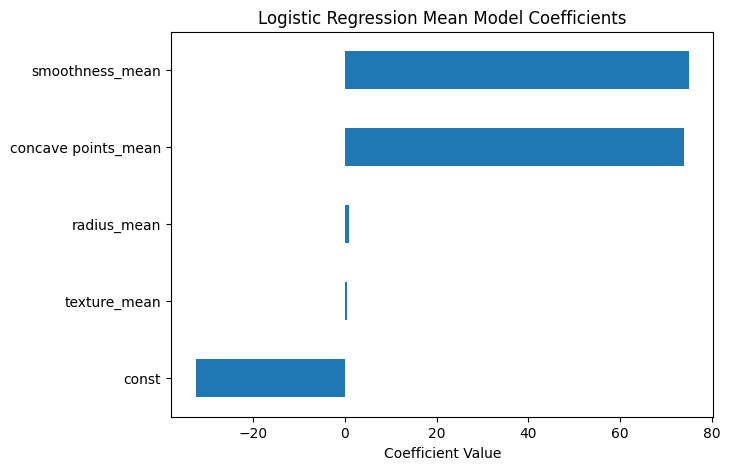

In [ ]:
mean_coef = lr_model_mean_new.params.sort_values()

plt.figure(figsize=(7,5))
mean_coef.plot(kind='barh')
plt.title("Logistic Regression Mean Model Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

**Conclusion**
- We observed that `smoothness` and `concave points` have the strongest influence on the malignancy of cells, whereas `radius` and `texture` have a comparatively smaller effect.

- This observation is clinically reasonable, as not every large tumor is malignant, but a small tumor with low smoothness (high `smoothness` in this case) can be a strong indicator of malignancy.

- Including the constant feature in the model, which has a negative coefficient, is also reasonable as it helps to fine-tune the model.

#####**Evaluation**

In [ ]:
y_pred_mean_train = lr_model_mean_new.predict(X_train_mean)
y_pred_mean_train = np.where(y_pred_mean_train > 0.5, 1, 0)

y_pred_mean_test = lr_model_mean_new.predict(X_test_mean)
y_pred_mean_test = np.where(y_pred_mean_test > 0.5, 1, 0)

In [ ]:
print("Mean_Model_Accuracy_train:", "%.3f" % metrics.accuracy_score(y_train_mean, y_pred_mean_train))
print("Mean_Model_Precision_train:", "%.3f" % metrics.precision_score(y_train_mean, y_pred_mean_train))
print("Mean_Model_Recall_train:", "%.3f" % metrics.recall_score(y_train_mean, y_pred_mean_train))
print("Mean_Model_F1 Score_train:", "%.3f" % metrics.f1_score(y_train_mean, y_pred_mean_train))

print("Mean_Model_Accuracy:", "%.3f" % metrics.accuracy_score(y_test_mean, y_pred_mean_test))
print("Mean_Model_Precision:", "%.3f" % metrics.precision_score(y_test_mean, y_pred_mean_test))
print("Mean_Model_Recall:", "%.3f" % metrics.recall_score(y_test_mean, y_pred_mean_test))
print("Mean_Model_F1 Score:", "%.3f" % metrics.f1_score(y_test_mean, y_pred_mean_test))

Mean_Model_Accuracy_train: 0.939
Mean_Model_Precision_train: 0.935
Mean_Model_Recall_train: 0.899
Mean_Model_F1 Score_train: 0.917
Mean_Model_Accuracy: 0.937
Mean_Model_Precision: 0.893
Mean_Model_Recall: 0.943
Mean_Model_F1 Score: 0.917


**Conclusion**
- We can observe that the accuracy and F1-score on both the training and test sets are nearly identical, indicating that the model is not overfitting.

- The high evaluation scores are partly due to the fact that our dataset is relatively small.

- To enable more accurate clinical application, a sufficiently large dataset is required.

####**Worst features**

#####**Build model**

In [ ]:
X_worst = df[worst_cols]
y = df['diagnosis']

X_train_worst, X_test_worst, y_train_worst, y_test_worst = train_test_split(X_worst, y, test_size = 0.25, stratify = y, random_state = 42)

X_train_worst = sm.add_constant(X_train_worst)
X_test_worst = sm.add_constant(X_test_worst)

lr_model_worst = sm.Logit(y_train_worst, X_train_worst).fit()

Optimization terminated successfully.
         Current function value: 0.089575
         Iterations 11


In [ ]:
lr_model_worst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  426
Model:                          Logit   Df Residuals:                      419
Method:                           MLE   Df Model:                            6
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.8644
Time:                        03:27:21   Log-Likelihood:                -38.159
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                6.593e-102
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -38.6638      6.587     -5.869      0.000     -51.575     -25.753
radius_worst                1.2477      0.241      5.172      0.000       0.775       1.721
texture_worst               0.3034      0.069      4.404      0.000       0.168       0.438
smoothness_worst           51.1019     22.216      2.300      0.021       7.560      94.644
concave points_worst       29.6418     13.584      2.182      0.029       3.018      56.266
symmetry_worst              9.6321      5.831      1.652      0.099      -1.796      21.060
fractal_dimension_worst   -42.3943     30.268     -1.401      0.161    -101.718      16.930
===========================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Because symmetry_worst and fractal_dimension_worst have p_value > 0.05 we remove it from the model**

In [ ]:
X_worst_new = df[worst_cols].drop(columns = ['symmetry_worst', 'fractal_dimension_worst'])
y = df['diagnosis']

X_train_worst, X_test_worst, y_train_worst, y_test_worst = train_test_split(X_worst_new, y, test_size = 0.25, stratify = y, random_state = 42)

X_train_worst = sm.add_constant(X_train_worst)
X_test_worst = sm.add_constant(X_test_worst)

lr_model_worst_new = sm.Logit(y_train_worst, X_train_worst).fit()

Optimization terminated successfully.
         Current function value: 0.093998
         Iterations 10


In [ ]:
lr_model_worst_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  426
Model:                          Logit   Df Residuals:                      421
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.8577
Time:                        03:27:21   Log-Likelihood:                -40.043
converged:                       True   LL-Null:                       -281.44
Covariance Type:            nonrobust   LLR p-value:                3.525e-103
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -36.5123      5.757     -6.342      0.000     -47.796     -25.229
radius_worst             1.2073      0.217      5.573      0.000       0.783       1.632
texture_worst            0.2859      0.063      4.538      0.000       0.162       0.409
smoothness_worst        39.1271     19.137      2.045      0.041       1.619      76.635
concave points_worst    28.5084     11.467      2.486      0.013       6.034      50.982
========================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

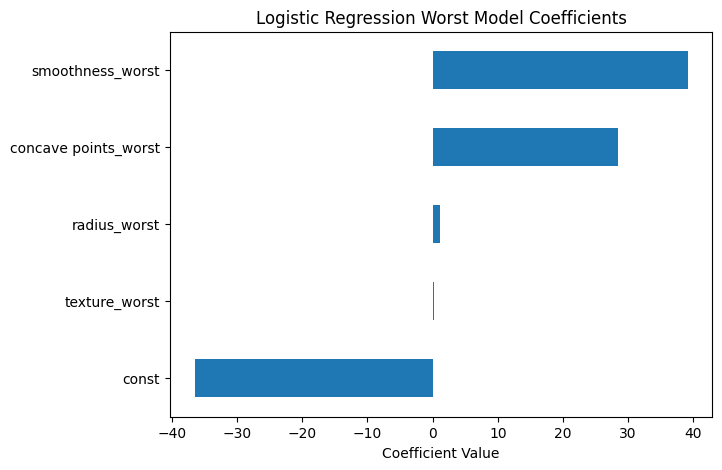

In [ ]:
worst_coef = lr_model_worst_new.params.sort_values()

plt.figure(figsize=(7,5))
worst_coef.plot(kind='barh')
plt.title("Logistic Regression Worst Model Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

#####**Evaluation**

In [ ]:
y_pred_worst_train = lr_model_worst_new.predict(X_train_worst)
y_pred_worst_train = np.where(y_pred_worst_train > 0.5, 1, 0)

y_pred_worst_test = lr_model_worst_new.predict(X_test_worst)
y_pred_worst_test = np.where(y_pred_worst_test > 0.5, 1, 0)


In [ ]:
print("Worst_Model_Accuracy_train:", "%.3f" % metrics.accuracy_score(y_train_worst, y_pred_worst_train))
print("Worst_Model_Precision_train:", "%.3f" % metrics.precision_score(y_train_worst, y_pred_worst_train))
print("Worst_Model_Recall_train:", "%.3f" % metrics.recall_score(y_train_worst, y_pred_worst_train))
print("Worst_Model_F1 Score_train:", "%.3f" % metrics.f1_score(y_train_worst, y_pred_worst_train))

print("Worst_Model_Accuracy:", "%.3f" % metrics.accuracy_score(y_test_worst, y_pred_worst_test))
print("Worst_Model_Precision:", "%.3f" % metrics.precision_score(y_test_worst, y_pred_worst_test))
print("Worst_Model_Recall:", "%.3f" % metrics.recall_score(y_test_worst, y_pred_worst_test))
print("Worst_Model_F1 Score:", "%.3f" % metrics.f1_score(y_test_worst, y_pred_worst_test))

Worst_Model_Accuracy_train: 0.972
Worst_Model_Precision_train: 0.974
Worst_Model_Recall_train: 0.950
Worst_Model_F1 Score_train: 0.962
Worst_Model_Accuracy: 0.986
Worst_Model_Precision: 0.981
Worst_Model_Recall: 0.981
Worst_Model_F1 Score: 0.981


##**5. Conclusion**

Based on the two models, it is evident that the likelihood of a cell being malignant is primarily influenced by four features: **radius, texture, concave points, smoothness**.

**Clinical Interpretation**

- Diagnosis is based on the most abnormal cell within the tissue sample.

- If even one malignant cell exists → the entire sample is considered cancerous.

**Model Selection**

**The worst-value model better reflects clinical practice → selected as the final predictive model**

**Model Interpretation**

- **Radius**: Each unit increase in `radius_worst` was associated with an estimated **e^1.207-fold** increase in the odds of cancer.

- **Texture**: Each unit increase in `texture_worst` was associated with an estimated **e^0.286-fold** increase in the odds of cancer.

- **Smoothness**: Each unit increase in `smoothness_worst` was associated with an estimated **e^39.127-fold** increase in the odds of cancer.

- **Concave points**: Each unit increase in `concave points_worst` was associated with an estimated **e^28.508-fold** increase in the odds of cancer.